---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_line.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## Scatter plots.

In [1]:
# installing the required roux subpackage
# !pip install roux[viz]
# loading requirements
import matplotlib.pyplot as plt

### Correlation plot
#### Demo data

In [2]:
import seaborn as sns
df1=sns.load_dataset('iris')
df1.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


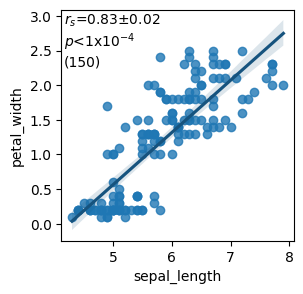

In [3]:
# plot
_,ax=plt.subplots(figsize=[3,3])
# from roux.viz.scatter import plot_scatter
%run ../../roux/roux/viz/scatter.py
ax=plot_scatter(
    df1.sort_values('sepal_length'),
    x='sepal_length',
    y='petal_width',
    hollow=False,
    stat_kws=dict(resample=True,),
    ax=ax,
    )

### Volcano plot
#### Demo data

In [ ]:
import pandas as pd
data = pd.read_csv('https://git.io/volcano_data1.csv')
data['P']=data['P'].replace(data['P'].min(),0) # to show P=0 as a triangle 
data=pd.concat([
    data.query(expr='P>=0.001'),
    data.query(expr='P<0.001').assign(
        **{'categories':lambda df: pd.qcut(df['BP'],3, labels=['low','med','high'])}, # to annotate
        ),
    ],axis=0)
data.head(1)

#### Plot

In [ ]:
from roux.viz.scatter import plot_volcano
ax=plot_volcano(
    data,
    colx='EFFECTSIZE',
    coly='P',
    colindex='SNP',
    show_labels=3, # show top n 
    collabel='SNP',
    text_increase='n',
    text_decrease='n',
    # palette=sns.color_palette()[:3], # increase, decrease, ns
    )

#### With highlighted points

In [ ]:
import seaborn as sns # required to set the palette of the outlines
ax=plot_volcano(
    data=data.query(expr="P<0.05"),
    colx='EFFECTSIZE',
    coly='P',
    colindex='SNP',
    # show_labels=3, # show top n 
    # collabel='SNP',
    show_outlines='categories',
    outline_colors=sns.color_palette()[:3],
    text_increase='n',
    text_decrease='n',
    palette=sns.color_palette('pastel')[:3], # increase, decrease, ns
    legend=True,
    )

### Documentation
[`roux.viz.scatter`](https://github.com/rraadd88/roux#module-roux.viz.scatter)